In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os as os
import sklearn

from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

import xgboost as xgb

In [2]:
sns.set_style({'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 #'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True})

sns.set_context({'font.size': 17.0,
 'axes.labelsize': 'medium',
 'axes.titlesize': 'large',
 'xtick.labelsize': 'medium',
 'ytick.labelsize': 'medium',
 'legend.fontsize': 'medium',
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0,
 'legend.title_fontsize': None})

In [3]:
## MRI data from Philadelphia Neurodevelopmental Cohort study, training data for age prediction
X = pd.read_csv('processedData\\PNCtraining.csv')
## Create a dictionary to map the current column names to the new numeric names
new_column_names = {col: str(i + 1) for i, col in enumerate(X.columns)}
## Rename the columns using the dictionary
X.rename(columns=new_column_names, inplace=True)

In [4]:
## Use only female subjects for age prediction model
Xfem = X[X['235'] == 'F']

In [5]:
## Load age data and reduce to female subjects
PNClabels = pd.read_csv('processedData\\PNClabels.csv')
PNClabelsFem = PNClabels[PNClabels.index.isin(Xfem.index)]

In [6]:
## Remove sex column from MRI feature df
Xfem.drop(columns = '235', inplace=True)
yfem = PNClabelsFem['ageAtScan']

C:\Users\ninag\AppData\Local\Temp\ipykernel_17816\3247475246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xfem.drop(columns = '235', inplace=True)


In [7]:
## Create train-test-split for model training
X_train, X_test, y_train, y_test = train_test_split(Xfem, yfem, random_state=0)

In [8]:
print(PNClabelsFem['ageAtScan'].max()/12)
print(PNClabelsFem['ageAtScan'].min()/12)

23.083333333333332
8.083333333333334


## Parameter tuning with grid search

In [9]:
hyperparameter_grid = {'max_depth': [3,6,9],
                    'max_leaves': [0,2,5,10],
                    'subsample': [0.5],
                    'learning_rate': [0.001,0.01,0.1,0.5,1,3],
                    'min_child_weight': [1,10,100],
                    'n_estimators': [100, 500, 1000]}

xgb_model = xgb.XGBRegressor()

clf = GridSearchCV(xgb_model, hyperparameter_grid, verbose=3, cv=5)

clf.fit(X_train, y_train)

print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END learning_rate=0.001, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.071 total time=   0.2s
[CV 2/5] END learning_rate=0.001, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.072 total time=   0.2s
[CV 3/5] END learning_rate=0.001, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.080 total time=   0.2s
[CV 4/5] END learning_rate=0.001, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.067 total time=   0.2s
[CV 5/5] END learning_rate=0.001, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.069 total time=   0.2s
[CV 1/5] END learning_rate=0.001, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0.264 total time=   1.2s
[CV 2/5] END learning_rate=0.001, max_depth=3, max_leaves=0,

[CV 2/5] END learning_rate=0.001, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.308 total time=   1.0s
[CV 3/5] END learning_rate=0.001, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.326 total time=   1.0s
[CV 4/5] END learning_rate=0.001, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.249 total time=   1.0s
[CV 5/5] END learning_rate=0.001, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.291 total time=   1.0s
[CV 1/5] END learning_rate=0.001, max_depth=3, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.047 total time=   0.1s
[CV 2/5] END learning_rate=0.001, max_depth=3, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.045 total time=   0.1s
[CV 3/5] END learning_rate=0.001, max_depth=3, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, sc

[CV 3/5] END learning_rate=0.001, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.285 total time=   1.0s
[CV 4/5] END learning_rate=0.001, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.233 total time=   1.0s
[CV 5/5] END learning_rate=0.001, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.255 total time=   1.0s
[CV 1/5] END learning_rate=0.001, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.359 total time=   2.1s
[CV 2/5] END learning_rate=0.001, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.414 total time=   2.1s
[CV 3/5] END learning_rate=0.001, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.426 total time=   2.2s
[CV 4/5] END learning_rate=0.001, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;

[CV 4/5] END learning_rate=0.001, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.036 total time=   0.1s
[CV 5/5] END learning_rate=0.001, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.036 total time=   0.1s
[CV 1/5] END learning_rate=0.001, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.159 total time=   0.6s
[CV 2/5] END learning_rate=0.001, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.173 total time=   0.6s
[CV 3/5] END learning_rate=0.001, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.193 total time=   0.6s
[CV 4/5] END learning_rate=0.001, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.149 total time=   0.6s
[CV 5/5] END learning_rate=0.001, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=500, subs

[CV 5/5] END learning_rate=0.001, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=0.269 total time=   1.2s
[CV 1/5] END learning_rate=0.001, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.047 total time=   0.1s
[CV 2/5] END learning_rate=0.001, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.045 total time=   0.1s
[CV 3/5] END learning_rate=0.001, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.052 total time=   0.1s
[CV 4/5] END learning_rate=0.001, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.038 total time=   0.1s
[CV 5/5] END learning_rate=0.001, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.043 total time=   0.1s
[CV 1/5] END learning_rate=0.001, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=

[CV 1/5] END learning_rate=0.001, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.358 total time=   2.4s
[CV 2/5] END learning_rate=0.001, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.413 total time=   2.5s
[CV 3/5] END learning_rate=0.001, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.424 total time=   2.4s
[CV 4/5] END learning_rate=0.001, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.349 total time=   2.4s
[CV 5/5] END learning_rate=0.001, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.383 total time=   2.4s
[CV 1/5] END learning_rate=0.001, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.066 total time=   0.2s
[CV 2/5] END learning_rate=0.001, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, sc

[CV 2/5] END learning_rate=0.001, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.300 total time=   1.8s
[CV 3/5] END learning_rate=0.001, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.311 total time=   1.8s
[CV 4/5] END learning_rate=0.001, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.263 total time=   1.7s
[CV 5/5] END learning_rate=0.001, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.279 total time=   1.8s
[CV 1/5] END learning_rate=0.001, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.389 total time=   3.9s
[CV 2/5] END learning_rate=0.001, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.450 total time=   3.9s
[CV 3/5] END learning_rate=0.001, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=1000, subsampl

[CV 4/5] END learning_rate=0.001, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.036 total time=   0.1s
[CV 5/5] END learning_rate=0.001, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.036 total time=   0.1s
[CV 1/5] END learning_rate=0.001, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.159 total time=   0.6s
[CV 2/5] END learning_rate=0.001, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.173 total time=   0.6s
[CV 3/5] END learning_rate=0.001, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.193 total time=   0.6s
[CV 4/5] END learning_rate=0.001, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.149 total time=   0.6s
[CV 5/5] END learning_rate=0.001, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0

[CV 5/5] END learning_rate=0.001, max_depth=9, max_leaves=2, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=0.269 total time=   0.9s
[CV 1/5] END learning_rate=0.001, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.066 total time=   0.2s
[CV 2/5] END learning_rate=0.001, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.067 total time=   0.2s
[CV 3/5] END learning_rate=0.001, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.075 total time=   0.2s
[CV 4/5] END learning_rate=0.001, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.062 total time=   0.2s
[CV 5/5] END learning_rate=0.001, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.065 total time=   0.2s
[CV 1/5] END learning_rate=0.001, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=

[CV 1/5] END learning_rate=0.001, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.383 total time=   4.0s
[CV 2/5] END learning_rate=0.001, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.445 total time=   3.8s
[CV 3/5] END learning_rate=0.001, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.449 total time=   3.7s
[CV 4/5] END learning_rate=0.001, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.381 total time=   3.7s
[CV 5/5] END learning_rate=0.001, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.409 total time=   3.8s
[CV 1/5] END learning_rate=0.001, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.073 total time=   0.3s
[CV 2/5] END learning_rate=0.001, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=100, subsample=0

[CV 2/5] END learning_rate=0.01, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.648 total time=   1.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.607 total time=   1.1s
[CV 4/5] END learning_rate=0.01, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.549 total time=   1.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.594 total time=   1.1s
[CV 1/5] END learning_rate=0.01, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.536 total time=   2.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.671 total time=   2.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=

[CV 4/5] END learning_rate=0.01, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.251 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.266 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.437 total time=   0.4s
[CV 2/5] END learning_rate=0.01, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.557 total time=   0.5s
[CV 3/5] END learning_rate=0.01, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.562 total time=   0.4s
[CV 4/5] END learning_rate=0.01, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.495 total time=   0.4s
[CV 5/5] END learning_rate=0.01, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, sc

[CV 5/5] END learning_rate=0.01, max_depth=3, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=0.556 total time=   1.2s
[CV 1/5] END learning_rate=0.01, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.384 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.431 total time=   0.3s
[CV 3/5] END learning_rate=0.01, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.441 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.369 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.398 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0

[CV 1/5] END learning_rate=0.01, max_depth=6, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.519 total time=  10.9s
[CV 2/5] END learning_rate=0.01, max_depth=6, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.656 total time=  10.8s
[CV 3/5] END learning_rate=0.01, max_depth=6, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.600 total time=  11.4s
[CV 4/5] END learning_rate=0.01, max_depth=6, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.529 total time=  12.9s
[CV 5/5] END learning_rate=0.01, max_depth=6, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.572 total time=  12.3s
[CV 1/5] END learning_rate=0.01, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.396 total time=   0.7s
[CV 2/5] END learning_rate=0.01, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.4

[CV 3/5] END learning_rate=0.01, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.550 total time=   0.5s
[CV 4/5] END learning_rate=0.01, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.489 total time=   0.5s
[CV 5/5] END learning_rate=0.01, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.527 total time=   0.5s
[CV 1/5] END learning_rate=0.01, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.498 total time=   1.0s
[CV 2/5] END learning_rate=0.01, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.636 total time=   1.1s
[CV 3/5] END learning_rate=0.01, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.593 total time=   1.0s
[CV 4/5] END learning_rate=0.01, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score

[CV 4/5] END learning_rate=0.01, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.251 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.266 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.437 total time=   0.6s
[CV 2/5] END learning_rate=0.01, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.557 total time=   0.6s
[CV 3/5] END learning_rate=0.01, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.562 total time=   0.6s
[CV 4/5] END learning_rate=0.01, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.495 total time=   0.6s
[CV 5/5] END learning_rate=0.01, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, sc

[CV 5/5] END learning_rate=0.01, max_depth=6, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=0.556 total time=   1.2s
[CV 1/5] END learning_rate=0.01, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.385 total time=   3.2s
[CV 2/5] END learning_rate=0.01, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.445 total time=   3.1s
[CV 3/5] END learning_rate=0.01, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.438 total time=   3.1s
[CV 4/5] END learning_rate=0.01, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.377 total time=   3.1s
[CV 5/5] END learning_rate=0.01, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.404 total time=   3.2s
[CV 1/5] END learning_rate=0.01, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0.501 

[CV 2/5] END learning_rate=0.01, max_depth=9, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.633 total time=   1.0s
[CV 3/5] END learning_rate=0.01, max_depth=9, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.594 total time=   1.1s
[CV 4/5] END learning_rate=0.01, max_depth=9, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.536 total time=   1.1s
[CV 5/5] END learning_rate=0.01, max_depth=9, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.591 total time=   1.1s
[CV 1/5] END learning_rate=0.01, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.285 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.308 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.3

[CV 4/5] END learning_rate=0.01, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.540 total time=   1.1s
[CV 5/5] END learning_rate=0.01, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.586 total time=   1.1s
[CV 1/5] END learning_rate=0.01, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.534 total time=   2.2s
[CV 2/5] END learning_rate=0.01, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.680 total time=   2.2s
[CV 3/5] END learning_rate=0.01, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.605 total time=   2.2s
[CV 4/5] END learning_rate=0.01, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.566 total time=   2.2s
[CV 5/5] END learning_rate=0.01, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, scor

[CV 1/5] END learning_rate=0.01, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.437 total time=   0.6s
[CV 2/5] END learning_rate=0.01, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.557 total time=   0.6s
[CV 3/5] END learning_rate=0.01, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.562 total time=   0.6s
[CV 4/5] END learning_rate=0.01, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.495 total time=   0.6s
[CV 5/5] END learning_rate=0.01, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.503 total time=   0.6s
[CV 1/5] END learning_rate=0.01, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=0.488 total time=   1.2s
[CV 2/5] END learning_rate=0.01, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample

[CV 4/5] END learning_rate=0.1, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.492 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.589 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0.501 total time=   0.5s
[CV 2/5] END learning_rate=0.1, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0.616 total time=   0.6s
[CV 3/5] END learning_rate=0.1, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0.537 total time=   0.5s
[CV 4/5] END learning_rate=0.1, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0.524 total time=   0.5s
[CV 5/5] END learning_rate=0.1, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0.610 total time=

[CV 1/5] END learning_rate=0.1, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.541 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.617 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.605 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.514 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.605 total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.516 total time=   1.1s
[CV 2/5] END learning_rate=0.1, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.608 tota

[CV 3/5] END learning_rate=0.1, max_depth=3, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.548 total time=   2.1s
[CV 4/5] END learning_rate=0.1, max_depth=3, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.524 total time=   2.1s
[CV 5/5] END learning_rate=0.1, max_depth=3, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.618 total time=   2.1s
[CV 1/5] END learning_rate=0.1, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.480 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.619 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.588 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, sc

[CV 5/5] END learning_rate=0.1, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.543 total time=   0.6s
[CV 1/5] END learning_rate=0.1, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=0.438 total time=   1.2s
[CV 2/5] END learning_rate=0.1, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=0.633 total time=   1.2s
[CV 3/5] END learning_rate=0.1, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=0.512 total time=   1.2s
[CV 4/5] END learning_rate=0.1, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=0.443 total time=   1.2s
[CV 5/5] END learning_rate=0.1, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=0.494 total time=   1.2s
[CV 1/5] END learning_rate=0.1, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=

[CV 2/5] END learning_rate=0.1, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0.611 total time=   1.1s
[CV 3/5] END learning_rate=0.1, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0.553 total time=   1.1s
[CV 4/5] END learning_rate=0.1, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0.507 total time=   1.1s
[CV 5/5] END learning_rate=0.1, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0.569 total time=   1.1s
[CV 1/5] END learning_rate=0.1, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.538 total time=   2.3s
[CV 2/5] END learning_rate=0.1, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.610 total time=   2.4s
[CV 3/5] END learning_rate=0.1, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.548 total ti

[CV 4/5] END learning_rate=0.1, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.524 total time=   0.4s
[CV 5/5] END learning_rate=0.1, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.626 total time=   0.3s
[CV 1/5] END learning_rate=0.1, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.482 total time=   1.8s
[CV 2/5] END learning_rate=0.1, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.618 total time=   1.8s
[CV 3/5] END learning_rate=0.1, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.584 total time=   1.7s
[CV 4/5] END learning_rate=0.1, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.522 total time=   1.8s
[CV 5/5] END learning_rate=0.1, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.6

[CV 2/5] END learning_rate=0.1, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.619 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.588 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.503 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.550 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.477 total time=   0.6s
[CV 2/5] END learning_rate=0.1, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.651 total time=   0.6s
[CV 3/5] END learning_rate=0.1, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.5

[CV 4/5] END learning_rate=0.1, max_depth=9, max_leaves=2, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=0.443 total time=   0.9s
[CV 5/5] END learning_rate=0.1, max_depth=9, max_leaves=2, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=0.494 total time=   0.9s
[CV 1/5] END learning_rate=0.1, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.552 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.627 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.603 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.480 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.592 total

[CV 1/5] END learning_rate=0.1, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.537 total time=   3.9s
[CV 2/5] END learning_rate=0.1, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.622 total time=   4.0s
[CV 3/5] END learning_rate=0.1, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.514 total time=   4.0s
[CV 4/5] END learning_rate=0.1, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.483 total time=   4.1s
[CV 5/5] END learning_rate=0.1, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.572 total time=   3.9s
[CV 1/5] END learning_rate=0.1, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.474 total time=   0.3s
[CV 2/5] END learning_rate=0.1, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.6

[CV 3/5] END learning_rate=0.5, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.199 total time=   1.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.358 total time=   1.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.393 total time=   1.0s
[CV 1/5] END learning_rate=0.5, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.152 total time=   1.5s
[CV 2/5] END learning_rate=0.5, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.288 total time=   1.6s
[CV 3/5] END learning_rate=0.5, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.199 total time=   1.5s
[CV 4/5] END learning_rate=0.5, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.358 

[CV 1/5] END learning_rate=0.5, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.222 total time=   0.4s
[CV 2/5] END learning_rate=0.5, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.496 total time=   0.5s
[CV 3/5] END learning_rate=0.5, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.243 total time=   0.4s
[CV 4/5] END learning_rate=0.5, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.241 total time=   0.4s
[CV 5/5] END learning_rate=0.5, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.228 total time=   0.4s
[CV 1/5] END learning_rate=0.5, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=0.151 total time=   0.9s
[CV 2/5] END learning_rate=0.5, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=0

[CV 3/5] END learning_rate=0.5, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.128 total time=   0.2s
[CV 4/5] END learning_rate=0.5, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.189 total time=   0.2s
[CV 5/5] END learning_rate=0.5, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.231 total time=   0.2s
[CV 1/5] END learning_rate=0.5, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0.339 total time=   1.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0.232 total time=   1.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0.122 total time=   1.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0.194 tota

[CV 5/5] END learning_rate=0.5, max_depth=6, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.222 total time=   2.5s
[CV 1/5] END learning_rate=0.5, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.081 total time=   0.6s
[CV 2/5] END learning_rate=0.5, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.277 total time=   0.6s
[CV 3/5] END learning_rate=0.5, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.225 total time=   0.6s
[CV 4/5] END learning_rate=0.5, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.114 total time=   0.7s
[CV 5/5] END learning_rate=0.5, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.316 total time=   0.5s
[CV 1/5] END learning_rate=0.5, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.080 tota

[CV 2/5] END learning_rate=0.5, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.322 total time=   1.1s
[CV 3/5] END learning_rate=0.5, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.175 total time=   1.1s
[CV 4/5] END learning_rate=0.5, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.290 total time=   1.0s
[CV 5/5] END learning_rate=0.5, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=0.301 total time=   1.0s
[CV 1/5] END learning_rate=0.5, max_depth=6, max_leaves=2, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.453 total time=   0.1s
[CV 2/5] END learning_rate=0.5, max_depth=6, max_leaves=2, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.598 total time=   0.1s
[CV 3/5] END learning_rate=0.5, max_depth=6, max_leaves=2, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.4

[CV 4/5] END learning_rate=0.5, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.241 total time=   0.6s
[CV 5/5] END learning_rate=0.5, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.228 total time=   0.6s
[CV 1/5] END learning_rate=0.5, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=0.151 total time=   1.3s
[CV 2/5] END learning_rate=0.5, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=0.461 total time=   1.3s
[CV 3/5] END learning_rate=0.5, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=0.196 total time=   1.3s
[CV 4/5] END learning_rate=0.5, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=0.166 total time=   1.3s
[CV 5/5] END learning_rate=0.5, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, scor

[CV 1/5] END learning_rate=0.5, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0.251 total time=   2.9s
[CV 2/5] END learning_rate=0.5, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0.312 total time=   2.8s
[CV 3/5] END learning_rate=0.5, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0.124 total time=   2.8s
[CV 4/5] END learning_rate=0.5, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0.069 total time=   3.1s
[CV 5/5] END learning_rate=0.5, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=0.237 total time=   2.9s
[CV 1/5] END learning_rate=0.5, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.251 total time=   3.6s
[CV 2/5] END learning_rate=0.5, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=0.312 total tim

[CV 4/5] END learning_rate=0.5, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.383 total time=   0.1s
[CV 5/5] END learning_rate=0.5, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=0.447 total time=   0.1s
[CV 1/5] END learning_rate=0.5, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.245 total time=   0.5s
[CV 2/5] END learning_rate=0.5, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.326 total time=   0.5s
[CV 3/5] END learning_rate=0.5, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.169 total time=   0.5s
[CV 4/5] END learning_rate=0.5, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.297 total time=   0.5s
[CV 5/5] END learning_rate=0.5, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=0.332 tota

[CV 2/5] END learning_rate=0.5, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.598 total time=   0.1s
[CV 3/5] END learning_rate=0.5, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.424 total time=   0.1s
[CV 4/5] END learning_rate=0.5, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.485 total time=   0.1s
[CV 5/5] END learning_rate=0.5, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.411 total time=   0.1s
[CV 1/5] END learning_rate=0.5, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.222 total time=   0.6s
[CV 2/5] END learning_rate=0.5, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.496 total time=   0.6s
[CV 3/5] END learning_rate=0.5, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=0.2

[CV 4/5] END learning_rate=0.5, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=0.166 total time=   1.2s
[CV 5/5] END learning_rate=0.5, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=0.178 total time=   1.2s
[CV 1/5] END learning_rate=1, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-3.422 total time=   0.2s
[CV 2/5] END learning_rate=1, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-2.569 total time=   0.2s
[CV 3/5] END learning_rate=1, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-2.031 total time=   0.2s
[CV 4/5] END learning_rate=1, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-2.864 total time=   0.2s
[CV 5/5] END learning_rate=1, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-2.503 total ti

[CV 1/5] END learning_rate=1, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=-1.339 total time=   1.0s
[CV 2/5] END learning_rate=1, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=-1.025 total time=   1.0s
[CV 3/5] END learning_rate=1, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=-1.401 total time=   1.0s
[CV 4/5] END learning_rate=1, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=-0.689 total time=   1.0s
[CV 5/5] END learning_rate=1, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=-1.135 total time=   1.0s
[CV 1/5] END learning_rate=1, max_depth=3, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-0.541 total time=   0.1s
[CV 2/5] END learning_rate=1, max_depth=3, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-0.318 total time=

[CV 3/5] END learning_rate=1, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=-2.723 total time=   1.0s
[CV 4/5] END learning_rate=1, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=-3.019 total time=   1.0s
[CV 5/5] END learning_rate=1, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=-3.112 total time=   1.0s
[CV 1/5] END learning_rate=1, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=-4.708 total time=   2.1s
[CV 2/5] END learning_rate=1, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=-2.740 total time=   2.1s
[CV 3/5] END learning_rate=1, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=-2.724 total time=   2.1s
[CV 4/5] END learning_rate=1, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=-3.024 total t

[CV 1/5] END learning_rate=1, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=-0.329 total time=   0.6s
[CV 2/5] END learning_rate=1, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=-0.159 total time=   0.6s
[CV 3/5] END learning_rate=1, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=-0.219 total time=   0.6s
[CV 4/5] END learning_rate=1, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=-0.354 total time=   0.6s
[CV 5/5] END learning_rate=1, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=-0.277 total time=   0.6s
[CV 1/5] END learning_rate=1, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=-0.249 total time=   1.2s
[CV 2/5] END learning_rate=1, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=-0

[CV 4/5] END learning_rate=1, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-0.324 total time=   0.1s
[CV 5/5] END learning_rate=1, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-0.308 total time=   0.1s
[CV 1/5] END learning_rate=1, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=-1.254 total time=   0.5s
[CV 2/5] END learning_rate=1, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=-1.004 total time=   0.5s
[CV 3/5] END learning_rate=1, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=-1.463 total time=   0.5s
[CV 4/5] END learning_rate=1, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=-0.625 total time=   0.5s
[CV 5/5] END learning_rate=1, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=-0.961 total time=   0.5s

[CV 1/5] END learning_rate=1, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-2.075 total time=   0.2s
[CV 2/5] END learning_rate=1, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-3.161 total time=   0.2s
[CV 3/5] END learning_rate=1, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-2.190 total time=   0.2s
[CV 4/5] END learning_rate=1, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-3.086 total time=   0.2s
[CV 5/5] END learning_rate=1, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-1.957 total time=   0.2s
[CV 1/5] END learning_rate=1, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=-2.484 total time=   1.0s
[CV 2/5] END learning_rate=1, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=-3.823 total time=

[CV 3/5] END learning_rate=1, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=-3.379 total time=   2.7s
[CV 4/5] END learning_rate=1, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=-2.715 total time=   2.6s
[CV 5/5] END learning_rate=1, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=-3.571 total time=   2.8s
[CV 1/5] END learning_rate=1, max_depth=6, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.060 total time=   0.1s
[CV 2/5] END learning_rate=1, max_depth=6, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.254 total time=   0.1s
[CV 3/5] END learning_rate=1, max_depth=6, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=0.040 total time=   0.1s
[CV 4/5] END learning_rate=1, max_depth=6, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-0.083 

[CV 5/5] END learning_rate=1, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=-0.277 total time=   0.6s
[CV 1/5] END learning_rate=1, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=-0.249 total time=   1.2s
[CV 2/5] END learning_rate=1, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=-0.188 total time=   1.2s
[CV 3/5] END learning_rate=1, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=-0.225 total time=   1.3s
[CV 4/5] END learning_rate=1, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=-0.398 total time=   1.2s
[CV 5/5] END learning_rate=1, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=-0.334 total time=   1.2s
[CV 1/5] END learning_rate=1, max_depth=9, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-0.435 t

[CV 2/5] END learning_rate=1, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=-2.753 total time=   1.1s
[CV 3/5] END learning_rate=1, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=-2.422 total time=   1.2s
[CV 4/5] END learning_rate=1, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=-1.785 total time=   1.2s
[CV 5/5] END learning_rate=1, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=-1.634 total time=   1.1s
[CV 1/5] END learning_rate=1, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=-3.074 total time=   2.3s
[CV 2/5] END learning_rate=1, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=-2.752 total time=   2.4s
[CV 3/5] END learning_rate=1, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=-2.425 total time=   2

[CV 4/5] END learning_rate=1, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-3.626 total time=   0.4s
[CV 5/5] END learning_rate=1, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-3.524 total time=   0.3s
[CV 1/5] END learning_rate=1, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=-4.829 total time=   1.9s
[CV 2/5] END learning_rate=1, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=-3.751 total time=   1.7s
[CV 3/5] END learning_rate=1, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=-3.256 total time=   1.9s
[CV 4/5] END learning_rate=1, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=-3.814 total time=   1.8s
[CV 5/5] END learning_rate=1, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=-3.613 tota

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.4s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.4s
[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-25464274813270238457177571033215830764797040430710647685120.000 total time=   0.2s
[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-358377120238913029642151789147955425055018744450052521984.000 total time=   0.2s
[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-3503689373810323264346584295032089556509168912967497940992.000 total time=   0.2s
[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-1408113542422419660515117541266951303857977244340191232.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=0, m

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s
[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-1859203254818995590057514318926271595242298107062386688.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3147916577802446038762630635561121659710250829729698414592.000 total time=   0.1s
[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3410466371822886761899434068451109667684345598608406478848.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-6420389719001516032615679308298748325180773505842544640.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=0,

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s
[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-1158392361229956087865670260369058034174739478017474560000.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-371797516444839889816235412241877604353341067789552582656.000 total time=   0.1s
[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-16008392682680383595185966144198909959472408666577529995264.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-1252464988852368663361499257284059580857840288818723291136.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=2, 

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.2s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.2s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.2s
[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-1158392361229956087865670260369058034174739478017474560000.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-371797516444839889816235412241877604353341067789552582656.000 total time=   0.1s
[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-16008392682680383595185966144198909959472408666577529995264.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-1252464988852368663361499257284059580857840288818723291136.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=2

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.2s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.2s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.2s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.2s
[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-1859203254818995590057514318926271595242298107062386688.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3147916577802446038762630635561121659710250829729698414592.000 total time=   0.1s
[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3410466371822886761899434068451109667684345598608406478848.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-6420389719001516032615679308298748325180773505842544640.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=2,

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   0.9s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=2, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s
[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-49893797669456851856825998746319151884825875531811654729728.000 total time=   0.2s
[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-12240815451924367199665322567616646458094307957117875650560.000 total time=   0.1s
[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-3080621396499066256573341910079976274328912231220998307840.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-2708163805905970815487501198244004859683457497215931514880.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=5

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.4s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.4s
[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-30442485910071530687522153087612640379110445350014855151616.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-12240815451924367199665322567616646458094307957117875650560.000 total time=   0.2s
[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-4697491802540568614375175538104421389078375516752524083200.000 total time=   0.2s
[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-906237122717301586972350824245094763621077828377688145920.000 total time=   0.2s
[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.8s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s
[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-1859203254818995590057514318926271595242298107062386688.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3147916577802446038762630635561121659710250829729698414592.000 total time=   0.1s
[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3410466371822886761899434068451109667684345598608406478848.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-6420389719001516032615679308298748325180773505842544640.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=5,

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s
[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-10918103837389168419065018226092366474179145039137325711360.000 total time=   0.2s
[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-42625723499344924327674778072854496542967271996059025408.000 total time=   0.2s
[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-102593864451623270556079111534769375615545998007169187840.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-3598844640061391502696098675151547690268414120008433532928.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=1

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s
[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-25464274813270238457177571033215830764797040430710647685120.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-358377120238913029642151789147955425055018744450052521984.000 total time=   0.2s
[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-3503689373810323264346584295032089556509168912967497940992.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-1408113542422419660515117541266951303857977244340191232.000 total time=   0.2s
[CV 5/5] END learning_rate=3, max_depth=3, max_leaves

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s
[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-1859203254818995590057514318926271595242298107062386688.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3147916577802446038762630635561121659710250829729698414592.000 total time=   0.1s
[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3410466371822886761899434068451109667684345598608406478848.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-6420389719001516032615679308298748325180773505842544640.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=3, max_leav

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=3, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s
[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-4423125878054716703914703924473894582470183329668247060480.000 total time=   0.8s
[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-130729505892703241645954991689119215010219962289719607296.000 total time=   0.8s
[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-76209945153453107503011778338272763222618830690814405902336.000 total time=   0.6s
[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-30466198834246012049064991734303517951300417818350957101056.000 total time=   0.7s
[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=0

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   1.4s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   1.4s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   1.1s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   1.2s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   1.2s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   2.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   2.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.9s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.8s
[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-4527883789830981195348020224859263093409339540842133585920.000 total time=   0.3s
[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-121136814613083266787745030549298538478634548772558864384.000 total time=   0.4s
[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-312994988985061620160719222784318554013270922683299659776.000 total time=   0.3s
[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-35399351957549055931335417590693685484627267978002432000.000 total time=   0.4s
[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=0, mi

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.8s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.9s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.8s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.9s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.9s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.4s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.5s
[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-1859203254818995590057514318926271595242298107062386688.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3147916577802446038762630635561121659710250829729698414592.000 total time=   0.1s
[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3410466371822886761899434068451109667684345598608406478848.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-6420389719001516032615679308298748325180773505842544640.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=0,

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s
[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-1158392361229956087865670260369058034174739478017474560000.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-371797516444839889816235412241877604353341067789552582656.000 total time=   0.1s
[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-16008392682680383595185966144198909959472408666577529995264.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-1252464988852368663361499257284059580857840288818723291136.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=2, 

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s
[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-1158392361229956087865670260369058034174739478017474560000.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-371797516444839889816235412241877604353341067789552582656.000 total time=   0.1s
[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-16008392682680383595185966144198909959472408666577529995264.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-1252464988852368663361499257284059580857840288818723291136.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=2

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.2s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.2s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.2s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.2s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.2s
[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-1859203254818995590057514318926271595242298107062386688.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3147916577802446038762630635561121659710250829729698414592.000 total time=   0.1s
[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3410466371822886761899434068451109667684345598608406478848.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-6420389719001516032615679308298748325180773505842544640.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=2,

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.4s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   0.9s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=2, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   0.9s
[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-49924850658555010728095345637118451982701063475948035244032.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-12240815451924367199665322567616646458094307957117875650560.000 total time=   0.2s
[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-3080621396499066256573341910079976274328912231220998307840.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-2708163805905970815487501198244004859683457497215931514880.000 total time=   0.2s
[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=5

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s
[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-32284339836537606709379491519839480485305481673670918144000.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-12240815451924367199665322567616646458094307957117875650560.000 total time=   0.1s
[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-4697491802540568614375175538104421389078375516752524083200.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-906237122717301586972350824245094763621077828377688145920.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s
[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-1859203254818995590057514318926271595242298107062386688.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3147916577802446038762630635561121659710250829729698414592.000 total time=   0.1s
[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3410466371822886761899434068451109667684345598608406478848.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-6420389719001516032615679308298748325180773505842544640.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=5,

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s
[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-15511865726005189675150319883453119285806331673768554921984.000 total time=   0.2s
[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-111112951669126087648948414322868304719037753137471422464.000 total time=   0.2s
[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-4135592974620065246018964071651757235438771046468043145216.000 total time=   0.2s
[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-8015906708264161075679849064670013327671514846571054235648.000 total time=   0.2s
[CV 5/5] END learning_rate=3, max_depth=6, max_leaves

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.9s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.9s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.8s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.8s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.4s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.4s
[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-8662893977575520524945142789631928958679596077058506096640.000 total time=   0.2s
[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-842848774971305701668700180798184467076332725143336910848.000 total time=   0.2s
[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-273408763039057079588514357420591835523348666206704893952.000 total time=   0.2s
[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-1491164135874714626011793646156658731129694673410331770880.000 total time=   0.3s
[CV 5/5] END learning_rate=3, max_depth=6, max_leave

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.8s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.8s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.8s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.8s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.4s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.4s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.5s
[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-1859203254818995590057514318926271595242298107062386688.000 total time=   0.2s
[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3147916577802446038762630635561121659710250829729698414592.000 total time=   0.2s
[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3410466371822886761899434068451109667684345598608406478848.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-6420389719001516032615679308298748325180773505842544640.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=6, max_leav

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=6, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.2s
[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-80652129832569734265422237745022670995254167539948648923136.000 total time=   2.0s
[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-4523194687903194023541376927846114628905444587702734290944.000 total time=   1.5s
[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-28343937870330216058108207110532406220587462763651761438720.000 total time=   1.7s
[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-156599773646130497162198296265809737165227315132299688804352.000 total time=   1.5s
[CV 5/5] END learning_rate=3, max_depth=9, max_leave

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   2.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   2.1s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   2.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   2.2s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   2.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   4.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   5.4s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   4.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   3.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   3.5s
[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-147736087452197944815201216837987795271017744576572030976.000 total time=   0.5s
[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-83551235497590638334397060216319781730266323999069831168.000 total time=   0.4s
[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-25573183121333675980943997050919568988436711503711698944.000 total time=   0.4s
[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-254189815232211247873434207049638283211133847821923385344.000 total time=   0.4s
[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=0, min_

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.9s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.9s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.9s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.8s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.8s
[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-1859203254818995590057514318926271595242298107062386688.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3147916577802446038762630635561121659710250829729698414592.000 total time=   0.1s
[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3410466371822886761899434068451109667684345598608406478848.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-6420389719001516032615679308298748325180773505842544640.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=0,

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=0, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s
[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-1158392361229956087865670260369058034174739478017474560000.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-371797516444839889816235412241877604353341067789552582656.000 total time=   0.1s
[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-16008392682680383595185966144198909959472408666577529995264.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-1252464988852368663361499257284059580857840288818723291136.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=2, 

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.2s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s
[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-1158392361229956087865670260369058034174739478017474560000.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-371797516444839889816235412241877604353341067789552582656.000 total time=   0.1s
[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-16008392682680383595185966144198909959472408666577529995264.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-1252464988852368663361499257284059580857840288818723291136.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=2

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.2s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.2s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.2s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.2s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.2s
[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-1859203254818995590057514318926271595242298107062386688.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3147916577802446038762630635561121659710250829729698414592.000 total time=   0.1s
[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3410466371822886761899434068451109667684345598608406478848.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-6420389719001516032615679308298748325180773505842544640.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=2,

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=2, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   0.9s
[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-49924850658555010728095345637118451982701063475948035244032.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-12240815451924367199665322567616646458094307957117875650560.000 total time=   0.2s
[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-3080621396499066256573341910079976274328912231220998307840.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-2708163805905970815487501198244004859683457497215931514880.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=5

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s
[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-32284339836537606709379491519839480485305481673670918144000.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-12240815451924367199665322567616646458094307957117875650560.000 total time=   0.1s
[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-4697491802540568614375175538104421389078375516752524083200.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-906237122717301586972350824245094763621077828377688145920.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.2s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s
[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-1859203254818995590057514318926271595242298107062386688.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3147916577802446038762630635561121659710250829729698414592.000 total time=   0.1s
[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3410466371822886761899434068451109667684345598608406478848.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-6420389719001516032615679308298748325180773505842544640.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=5,

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.1s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=5, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s
[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-15511865726005189675150319883453119285806331673768554921984.000 total time=   0.2s
[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-111112951669126087648948414322868304719037753137471422464.000 total time=   0.3s
[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-4135592974620065246018964071651757235438771046468043145216.000 total time=   0.2s
[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=100, subsample=0.5;, score=-8015906708264161075679849064670013327671514846571054235648.000 total time=   0.2s
[CV 5/5] END learning_rate=3, max_depth=9, max_leaves

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.8s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.8s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=500, subsample=0.5;, score=nan total time=   0.8s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.4s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.4s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.4s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.4s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=1, n_estimators=1000, subsample=0.5;, score=nan total time=   1.5s
[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-8662893977575520524945142789631928958679596077058506096640.000 total time=   0.2s
[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-842848774971305701668700180798184467076332725143336910848.000 total time=   0.2s
[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-273408763039057079588514357420591835523348666206704893952.000 total time=   0.2s
[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=100, subsample=0.5;, score=-1491164135874714626011793646156658731129694673410331770880.000 total time=   0.2s
[CV 5/5] END learning_rate=3, max_depth=9, max_leave

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=500, subsample=0.5;, score=nan total time=   0.7s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.4s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.3s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.4s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.4s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=10, n_estimators=1000, subsample=0.5;, score=nan total time=   1.4s
[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-1859203254818995590057514318926271595242298107062386688.000 total time=   0.1s
[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3147916577802446038762630635561121659710250829729698414592.000 total time=   0.1s
[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-3410466371822886761899434068451109667684345598608406478848.000 total time=   0.1s
[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=100, subsample=0.5;, score=-6420389719001516032615679308298748325180773505842544640.000 total time=   0.1s
[CV 5/5] END learning_rate=3, max_depth=9, max_leav

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.6s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=500, subsample=0.5;, score=nan total time=   0.5s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 1/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 2/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 3/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 4/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\base.py", line 760, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in

[CV 5/5] END learning_rate=3, max_depth=9, max_leaves=10, min_child_weight=100, n_estimators=1000, subsample=0.5;, score=nan total time=   1.0s
0.6007171329315232
{'learning_rate': 0.01, 'max_depth': 3, 'max_leaves': 5, 'min_child_weight': 10, 'n_estimators': 1000, 'subsample': 0.5}


## Using best parameters in model and testing it with holdout data

In [10]:
dtrain = xgb.DMatrix(X_train, label = y_train)

In [11]:
dtest = xgb.DMatrix(X_test, label = y_test)

In [12]:
import xgboost as xgb

param = {'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'learning_rate': 0.01,
    'max_depth': 6,
    'max_leaves': 0,
    'min_child_weight': 10,
    'subsample': 0.5,
    'seed': 123,
    'eval_metric': 'rmse'}

num_round = 1000

evallist = [(dtrain, 'train'), (dtest, 'eval')]

bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=10, verbose_eval=True)

[0]	train-rmse:44.09926	eval-rmse:41.90945
[1]	train-rmse:43.83363	eval-rmse:41.74736
[2]	train-rmse:43.60226	eval-rmse:41.59556
[3]	train-rmse:43.37119	eval-rmse:41.42845
[4]	train-rmse:43.11142	eval-rmse:41.26264
[5]	train-rmse:42.85753	eval-rmse:41.07352
[6]	train-rmse:42.61970	eval-rmse:40.89659
[7]	train-rmse:42.38157	eval-rmse:40.73453
[8]	train-rmse:42.17387	eval-rmse:40.56832
[9]	train-rmse:41.93321	eval-rmse:40.40824
[10]	train-rmse:41.68565	eval-rmse:40.21863
[11]	train-rmse:41.45039	eval-rmse:40.02905
[12]	train-rmse:41.19961	eval-rmse:39.83969
[13]	train-rmse:40.98107	eval-rmse:39.69855


C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[14]	train-rmse:40.74748	eval-rmse:39.53887
[15]	train-rmse:40.52229	eval-rmse:39.38584
[16]	train-rmse:40.31305	eval-rmse:39.25923
[17]	train-rmse:40.08878	eval-rmse:39.13013
[18]	train-rmse:39.85966	eval-rmse:38.95882
[19]	train-rmse:39.63996	eval-rmse:38.84043
[20]	train-rmse:39.43596	eval-rmse:38.69926
[21]	train-rmse:39.23804	eval-rmse:38.54733
[22]	train-rmse:39.01348	eval-rmse:38.40970
[23]	train-rmse:38.80197	eval-rmse:38.28730
[24]	train-rmse:38.59701	eval-rmse:38.14383
[25]	train-rmse:38.38230	eval-rmse:38.00206
[26]	train-rmse:38.18503	eval-rmse:37.84314
[27]	train-rmse:37.97299	eval-rmse:37.68118
[28]	train-rmse:37.77705	eval-rmse:37.54744
[29]	train-rmse:37.59737	eval-rmse:37.42563
[30]	train-rmse:37.40522	eval-rmse:37.29329
[31]	train-rmse:37.21107	eval-rmse:37.14687
[32]	train-rmse:37.03180	eval-rmse:37.05963
[33]	train-rmse:36.84353	eval-rmse:36.91571
[34]	train-rmse:36.64886	eval-rmse:36.76129
[35]	train-rmse:36.46785	eval-rmse:36.62127
[36]	train-rmse:36.27200	eval-rm

[198]	train-rmse:19.10332	eval-rmse:28.15624
[199]	train-rmse:19.03726	eval-rmse:28.14670
[200]	train-rmse:18.98101	eval-rmse:28.13721
[201]	train-rmse:18.92706	eval-rmse:28.10246
[202]	train-rmse:18.86298	eval-rmse:28.06864
[203]	train-rmse:18.79545	eval-rmse:28.04298
[204]	train-rmse:18.73527	eval-rmse:28.02916
[205]	train-rmse:18.68136	eval-rmse:28.01285
[206]	train-rmse:18.62208	eval-rmse:28.00049
[207]	train-rmse:18.56244	eval-rmse:27.98344
[208]	train-rmse:18.50150	eval-rmse:27.96641
[209]	train-rmse:18.43893	eval-rmse:27.95002
[210]	train-rmse:18.38981	eval-rmse:27.93739
[211]	train-rmse:18.35426	eval-rmse:27.93844
[212]	train-rmse:18.28998	eval-rmse:27.92574
[213]	train-rmse:18.23344	eval-rmse:27.90122
[214]	train-rmse:18.18742	eval-rmse:27.88289
[215]	train-rmse:18.13032	eval-rmse:27.87411
[216]	train-rmse:18.08963	eval-rmse:27.86237
[217]	train-rmse:18.02976	eval-rmse:27.84763
[218]	train-rmse:17.98182	eval-rmse:27.83590
[219]	train-rmse:17.93199	eval-rmse:27.80705
[220]	trai

[381]	train-rmse:11.66706	eval-rmse:26.50521
[382]	train-rmse:11.63629	eval-rmse:26.49020
[383]	train-rmse:11.60864	eval-rmse:26.47492
[384]	train-rmse:11.57807	eval-rmse:26.46828
[385]	train-rmse:11.54770	eval-rmse:26.46063
[386]	train-rmse:11.51817	eval-rmse:26.45158
[387]	train-rmse:11.49438	eval-rmse:26.43563
[388]	train-rmse:11.46785	eval-rmse:26.43107
[389]	train-rmse:11.44123	eval-rmse:26.43950
[390]	train-rmse:11.41196	eval-rmse:26.43415
[391]	train-rmse:11.38115	eval-rmse:26.42962
[392]	train-rmse:11.36167	eval-rmse:26.43309
[393]	train-rmse:11.33533	eval-rmse:26.44014
[394]	train-rmse:11.30645	eval-rmse:26.44290
[395]	train-rmse:11.27813	eval-rmse:26.44141
[396]	train-rmse:11.25339	eval-rmse:26.43610
[397]	train-rmse:11.22201	eval-rmse:26.43096
[398]	train-rmse:11.18980	eval-rmse:26.41762
[399]	train-rmse:11.16455	eval-rmse:26.42030
[400]	train-rmse:11.13670	eval-rmse:26.41302
[401]	train-rmse:11.11512	eval-rmse:26.40939
[402]	train-rmse:11.09341	eval-rmse:26.40910
[403]	trai

In [13]:
bst.save_model('femaleOnly.model')

C:\Users\ninag\anaconda3\envs\paper\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:24:15] WARNING: D:\bld\xgboost-split_1705650032250\work\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [14]:
## Load ABCD test data that was used for menarche classification
Test = pd.read_csv('processedData\\TestAgePredFeaturesHarmonised.csv')
Test.sort_values(by='subjectkey',inplace=True)
holdout_subs = Test['subjectkey']

## Load dataframe containing demographic data
MRIwithAgeSex = pd.read_csv('processedData\\processedMRIDataMenarcheSubsONLYSMRI.csv')
## Reduce the MRI data containing sex and age data to only the relevant subjects
MRIred = MRIwithAgeSex[MRIwithAgeSex['subjectkey'].isin(holdout_subs)] 
## Extract the info on sex and age from that dataframe
AgeSex = MRIred[['sex_M1','interview_age_M1','subjectkey']].copy()

Test = pd.merge(Test, AgeSex, how = 'outer', on = 'subjectkey')

In [15]:
## Create the age prediction features by dropping all columns that are not MRI features
ABCD_X = Test.drop(columns = ['subjectkey', 'sex_M1', 'interview_age_M1'])

## Create a dictionary to map the current column names to the new numeric names
new_column_names = {col: str(i + 1) for i, col in enumerate(ABCD_X.columns)}
## Rename the columns using the dictionary
ABCD_X.rename(columns=new_column_names, inplace=True)

ABCD_y = Test['interview_age_M1']

dABCD = xgb.DMatrix(ABCD_X)

In [16]:
ABCD_predictedAge = bst.predict(dABCD)

In [17]:
## Permutation test: Labels in the training data get shuffled and a model gets trained on the random training data
## and is then applied to the holdout data. Resulting (random) accuracies are compared to the baseline accuracy 
## generated by training the model on non-shuffled training data and applying it to the holdout data
param = {'objective': 'reg:squarederror',
        'booster': 'gbtree',
        'learning_rate': 0.01,
        'max_depth': 6,
        'max_leaves': 0,
        'min_child_weight': 10,
        'subsample': 0.5,
        'seed': 123,
        'eval_metric': 'rmse'}

from sklearn.metrics import mean_absolute_error
from numpy import mean

## Calculate empirical MAE
observed_accuracyTestData = mean_absolute_error(ABCD_predictedAge, ABCD_y)/12

## 1000 permutations and a list to save the results
n_permutations = 100
permuted_accuraciesTestData = []

## Use the same parameters as in the original model
for _ in range(n_permutations):
    dtrain = xgb.DMatrix(X_train, label = np.random.permutation(y_train))
    ## train the model on random data
    num_round = 10
    rand = xgb.train(param, dtrain, num_round, verbose_eval=True)
    
    ## use the model to classify menarche status in the test data
    predsRandom = rand.predict(dABCD)
    
    ## calculate and append accuracies to the list
    permuted_accuracy = mean_absolute_error(ABCD_y, predsRandom)/12
    permuted_accuraciesTestData.append(permuted_accuracy)


## calculate the p-value by looking at number of models with learned randomness that performed as good or better than the
## original model
p_valuePermTest = (np.sum(permuted_accuraciesTestData <= observed_accuracyTestData) + 1) / (n_permutations + 1)

print(f"Observed Accuracy: {observed_accuracyTestData}")
print(mean(permuted_accuraciesTestData))
print(f"P-value: {p_valuePermTest}")

Observed Accuracy: 1.0830620614076272
3.38489900119488
P-value: 0.009900990099009901


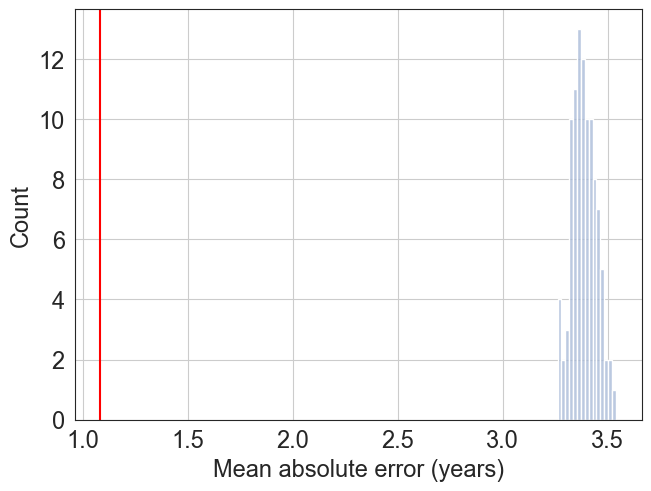

In [18]:
fig, ax = plt.subplots(constrained_layout = True)

sns.histplot(permuted_accuraciesTestData, bins=15, color='#A4B7D6')

ax.axvline(observed_accuracyTestData, color="red")

#ax.set_xlim([0.1,0.9])

ax.set_xlabel("Mean absolute error (years)")

#ax.set_title('Permutation Test Performed with Holdout Data', fontsize = 15)
plt.savefig('Plots\\permutationTest_AgePred1902.pdf', dpi = 1000)

In [19]:
dtest = xgb.DMatrix(X_test)

In [20]:
y_predict_age = bst.predict(dtest)

In [21]:
from scipy.stats.stats import pearsonr

C:\Users\ninag\AppData\Local\Temp\ipykernel_17816\4005289447.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [22]:
pearsonr(y_predict_age, y_test)

PearsonRResult(statistic=0.7876517873115181, pvalue=6.974577334705682e-43)

In [23]:
rmse = mean_squared_error(y_predict_age, y_test, squared=False)
print(f"RMSE of the base model: {rmse/12:.3f}")

RMSE of the base model: 2.166


Text(0, 0.5, 'Predicted Age')

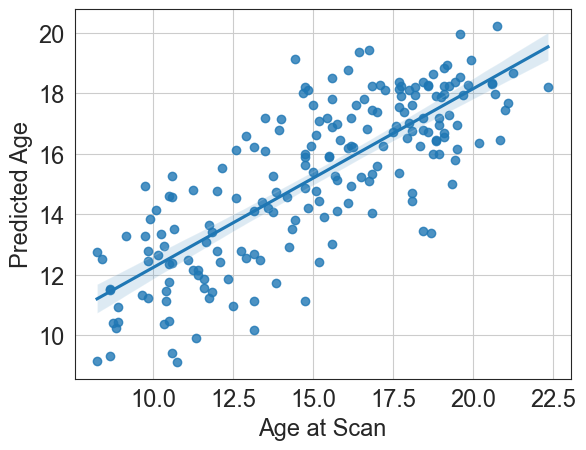

In [24]:
sn = sns.regplot(x = y_test/12, y = y_predict_age/12)
sn.set_xlabel('Age at Scan')
sn.set_ylabel('Predicted Age')
#plt.savefig('regplotBrainAgeFemaleModelPNC.png')

In [25]:
BAG = y_predict_age - y_test

Text(0.5, 0, 'Brain Age Gap')

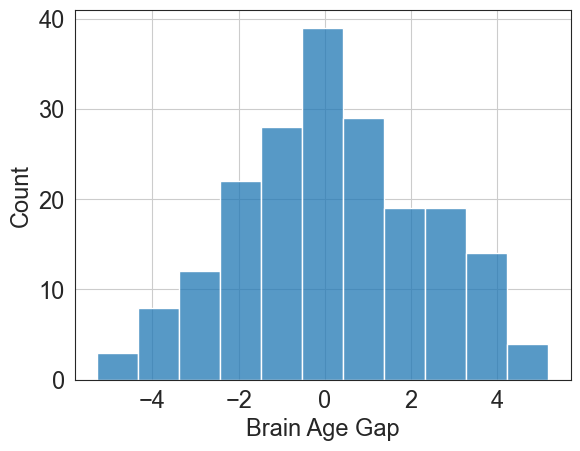

In [26]:
hist = sns.histplot(BAG/12)
hist.set_xlabel('Brain Age Gap')
#hist.set_title('Brain Age Gap Distribution in PNC Eval Data')
#plt.savefig('BAGhistPNC_Female.png', dpi = 1000)

In [27]:
pearsonr(ABCD_predictedAge, ABCD_y)

PearsonRResult(statistic=0.24696919319951782, pvalue=1.7305567395392464e-10)

<Axes: xlabel='interview_age_M1'>

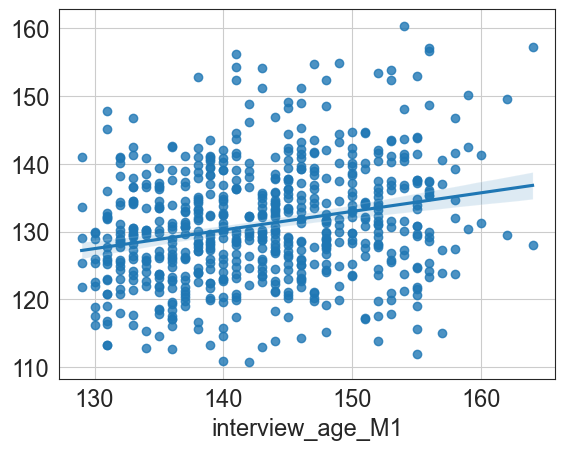

In [28]:
sns.regplot(x = ABCD_y, y = ABCD_predictedAge)

In [29]:
rmse = mean_squared_error(ABCD_predictedAge, ABCD_y, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 15.588


In [30]:
print(f"RMSE of the base model: {rmse/12:.3f}")

RMSE of the base model: 1.299


In [31]:
absoluteErrors = abs(ABCD_predictedAge - ABCD_y)

MAE = sum(absoluteErrors)

MAE = MAE/len(absoluteErrors)

MAE = MAE/12

MAE

1.0830620614076272

In [32]:
Test['predictedAge'] = ABCD_predictedAge
Test['BAG'] = Test['predictedAge'] - Test['interview_age_M1']

Text(0.5, 1.0, 'Brain Age Gap Distribution in ABCD Menarche Subjects when sex was included as a feature')

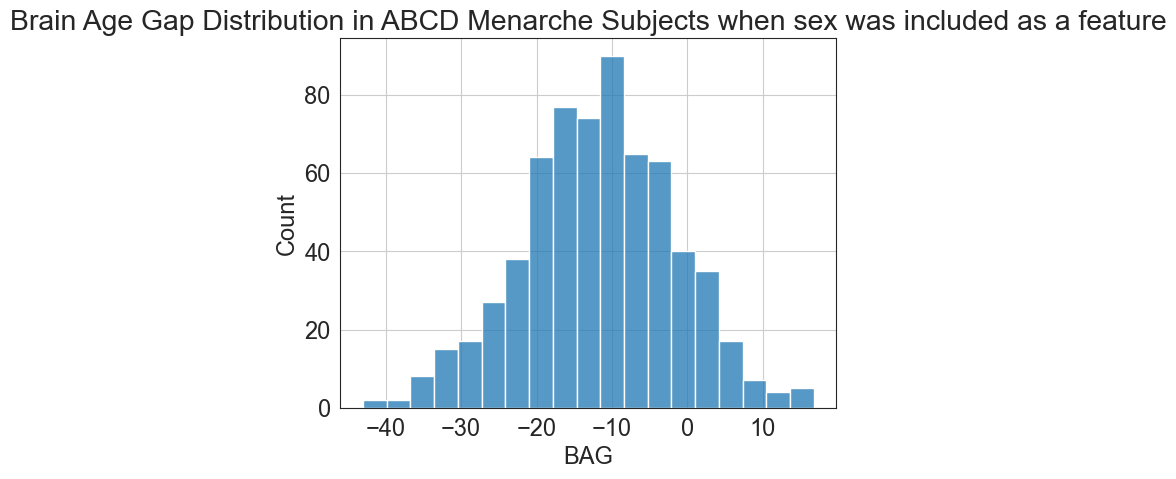

In [33]:
hist = sns.histplot(Test['BAG'])
hist.set_xlabel('BAG')
hist.set_title('Brain Age Gap Distribution in ABCD Menarche Subjects when sex was included as a feature')
#plt.savefig('BAGWithSexIncludedhist.png')

In [35]:
classprobsMenarche = pd.read_csv('processedData\\classprobabilitesDFfinal_independently_harmonizedScanMatchedAgePredFeaturesShrink071102.csv')

<Axes: xlabel='BAG', ylabel='prob post'>

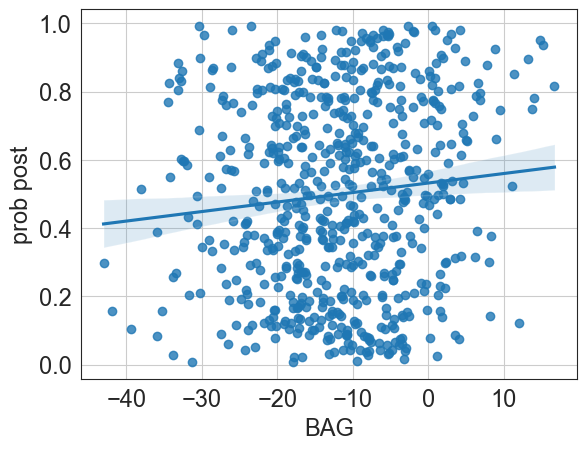

In [36]:
BAGandMenarche = classprobsMenarche.merge(Test, how = 'inner', on = 'subjectkey')

sns.regplot(x = BAGandMenarche['BAG'], y = BAGandMenarche['prob post'])

In [37]:
BAGandMenarche.to_csv('processedData\\BAGandMenarche.csv')